In [3]:
pip install numpy, matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'numpy,'
You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random

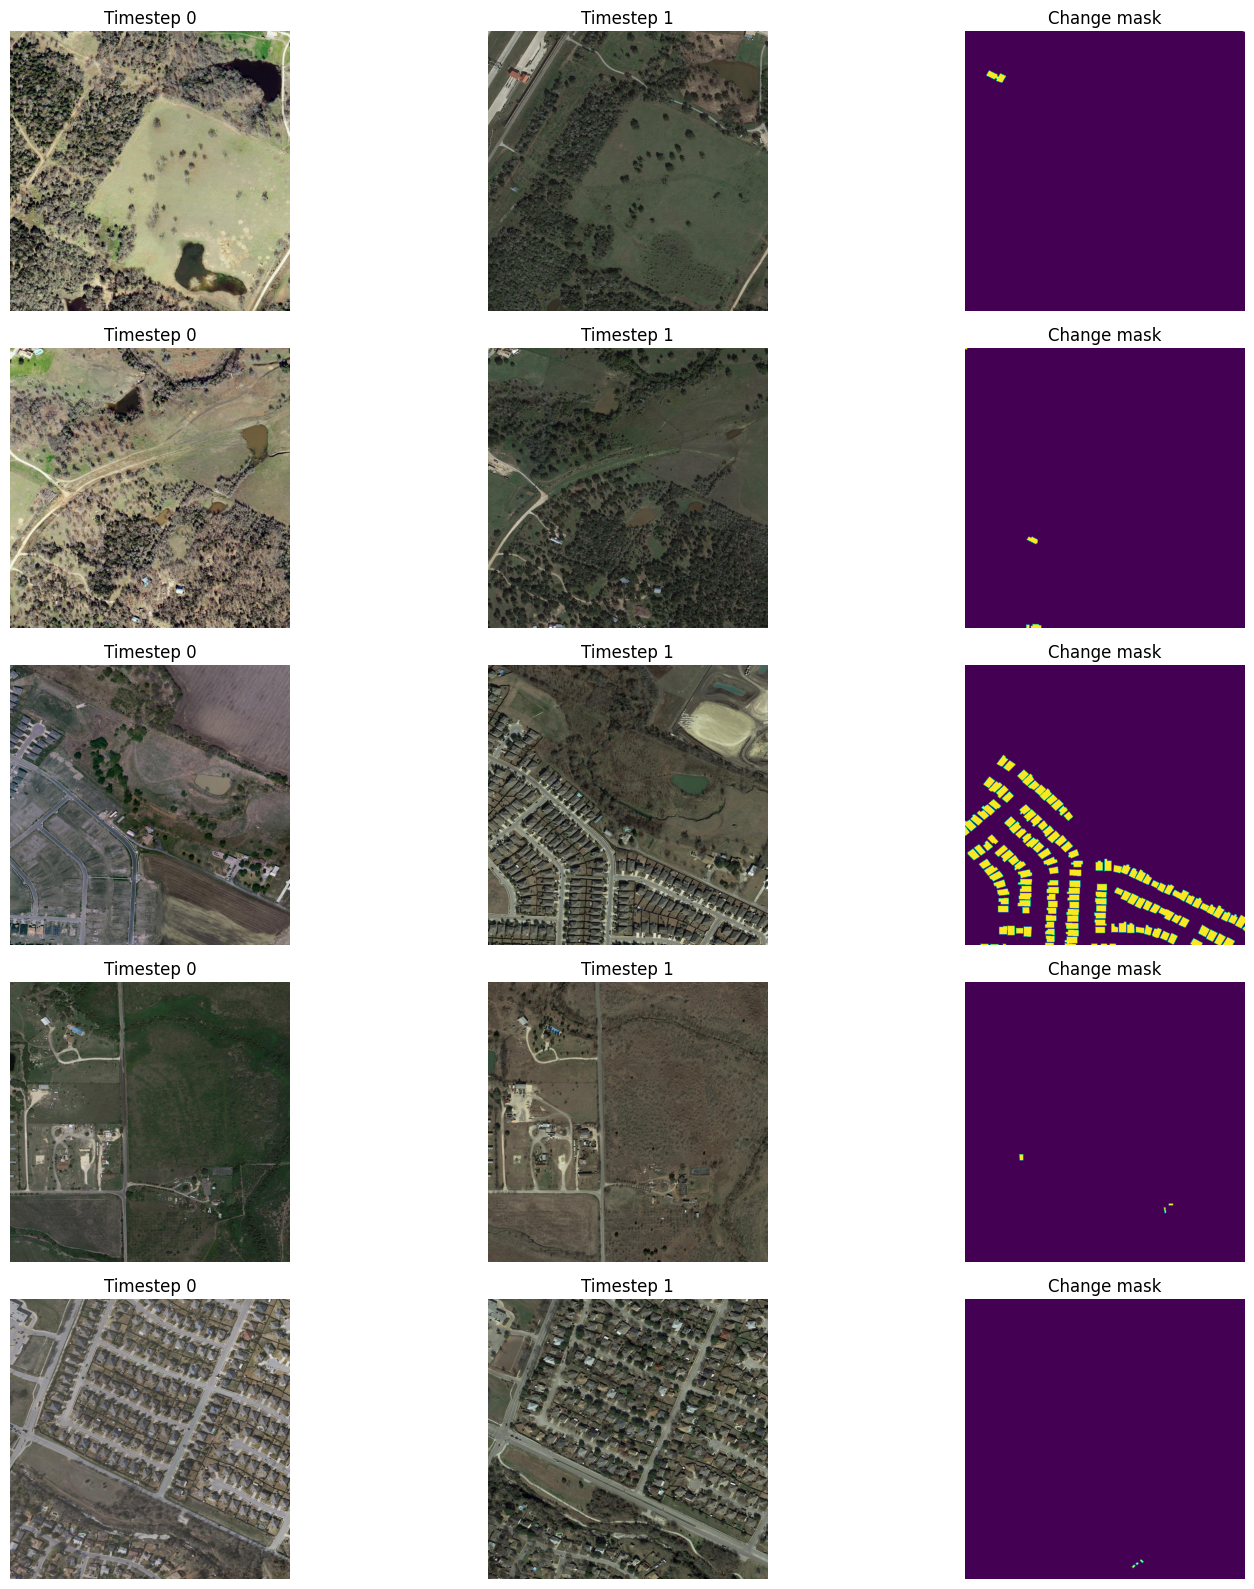

In [5]:
folder_path = "test/A/"
all_files = os.listdir(folder_path)
file_list = [file for file in all_files if os.path.isfile(os.path.join(folder_path, file))]
selected_files = random.sample(file_list, 5)


batch = [
    [folder_path + selected_files[0], 'test/B/' + selected_files[0], 'test/label/' + selected_files[0]],
    [folder_path + selected_files[1], 'test/B/' + selected_files[1], 'test/label/' + selected_files[1]],
    [folder_path + selected_files[2], 'test/B/' + selected_files[2], 'test/label/' + selected_files[2]],
    [folder_path + selected_files[3], 'test/B/' + selected_files[3], 'test/label/' + selected_files[3]],
    [folder_path + selected_files[4], 'test/B/' + selected_files[4], 'test/label/' + selected_files[4]]
]

fig, axes = plt.subplots(5, 3, figsize=(16, 16))

labels = ['Timestep 0', 'Timestep 1', 'Change mask']

for i, set in enumerate(batch):
    for j, image_path in enumerate(set):
        image = mpimg.imread(image_path)

        axes[i, j].imshow(image)
        axes[i, j].set_title(labels[j])
        axes[i, j].axis('off')  

plt.tight_layout()

plt.show()

In [6]:
folder_path_labels = "test/label/"
all_labels = os.listdir(folder_path_labels)
labels_list = [file for file in all_labels if os.path.isfile(os.path.join(folder_path_labels, file))]
total_change_percentage = 0
for i, file in enumerate(labels_list):
    image_label = mpimg.imread(folder_path_labels + labels_list[i])
    change_pixels = np.count_nonzero(image_label == 1)
    total_pixels = image_label.size
    total_change_percentage += (change_pixels / total_pixels) * 100
total_no_labels = len(labels_list)
total_change_percentage /= total_no_labels
print(f'Percentage of changed pixels in test set: {total_change_percentage} %')

Percentage of changed pixels in test set: 5.094211548566818 %


In [7]:
folder_path_labels = "train/label/"
all_labels = os.listdir(folder_path_labels)
labels_list = [file for file in all_labels if os.path.isfile(os.path.join(folder_path_labels, file))]
total_change_percentage = 0
for i, file in enumerate(labels_list):
    image_label = mpimg.imread(folder_path_labels + labels_list[i])
    change_pixels = np.count_nonzero(image_label == 1)
    total_pixels = image_label.size
    total_change_percentage += (change_pixels / total_pixels) * 100
total_no_labels = len(labels_list)
total_change_percentage /= total_no_labels
print(f'Percentage of changed pixels in train set: {total_change_percentage} %')

Percentage of changed pixels in train set: 4.588853857490454 %


Percentage of changed pixels in validation set: 4.196551442146301 %


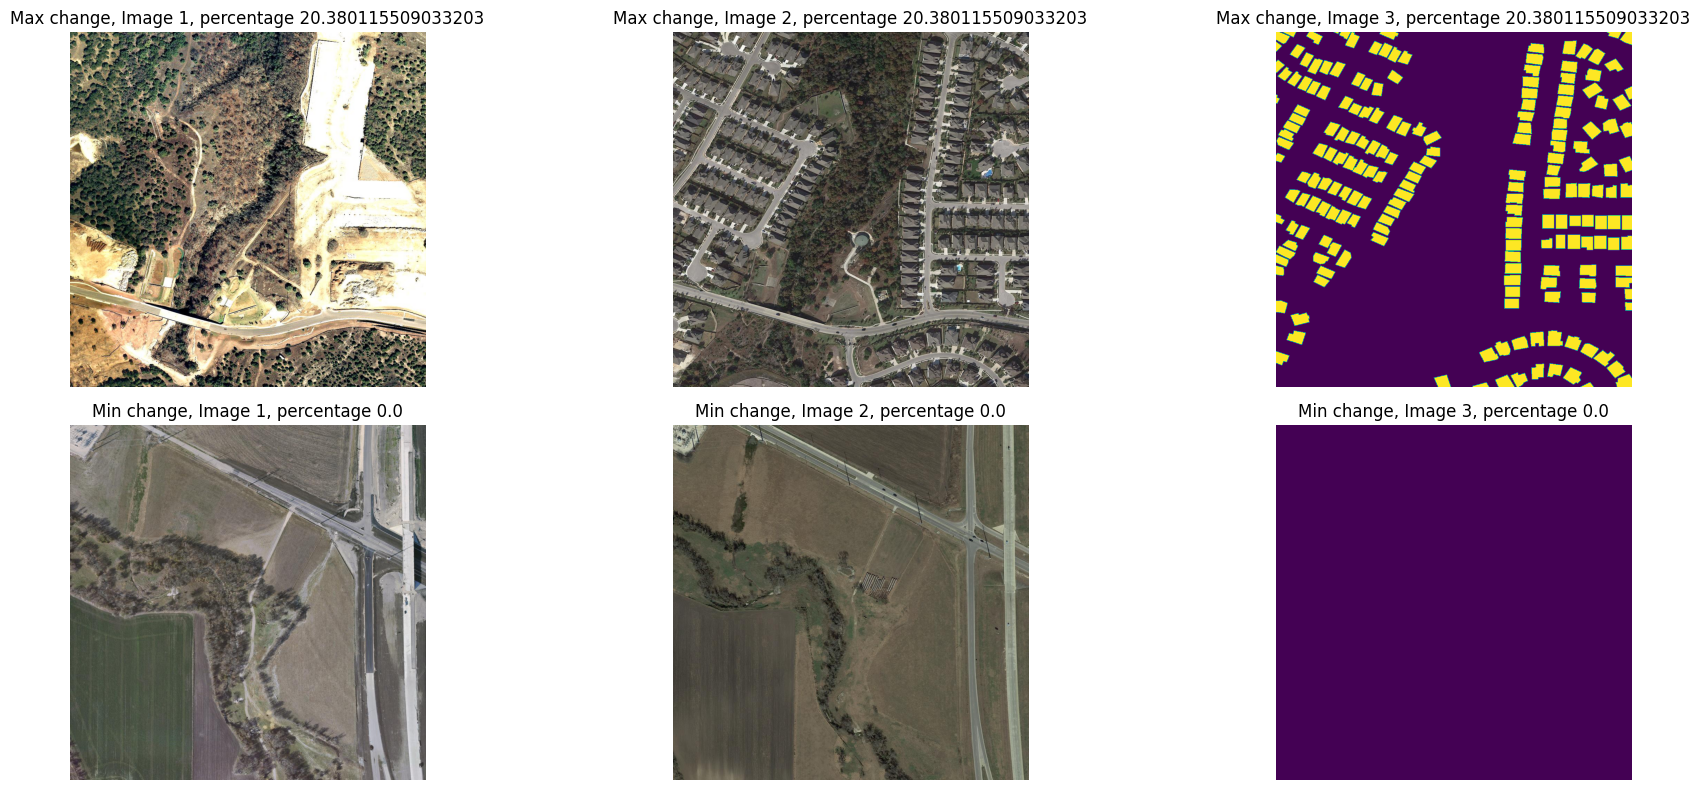

In [6]:
folder_path_labels = "val/label/"
all_labels = os.listdir(folder_path_labels)
labels_list = [file for file in all_labels if os.path.isfile(os.path.join(folder_path_labels, file))]
total_change_percentage = 0
max_change = 0
path_to_max =''
min_change = 100
path_to_min = ''
for i, file in enumerate(labels_list):
    image_label = mpimg.imread(folder_path_labels + labels_list[i])
    change_pixels = np.count_nonzero(image_label == 1)
    total_pixels = image_label.size
    change = (change_pixels / total_pixels) * 100
    total_change_percentage += change
    if change > max_change:
        max_change = change
        path_to_max = file
    if change < min_change:
        min_change = change
        path_to_min = file
    
total_no_labels = len(labels_list)
total_change_percentage /= total_no_labels
print(f'Percentage of changed pixels in validation set: {total_change_percentage} %')

image_paths_max = [
    "val/A/" + path_to_max,
    "val/B/" + path_to_max,
    "val/label/" + path_to_max,
]
image_paths_min = [
    "val/A/" + path_to_min,
    "val/B/" + path_to_min,
    "val/label/" + path_to_min,
]
# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

# Loop through each image path in the first set and display it in the corresponding subplot
for i, image_path in enumerate(image_paths_max):
    image = mpimg.imread(image_path)
    axes[0, i].imshow(image)
    axes[0, i].set_title(f'Max change, Image {i + 1}, percentage {max_change}')
    axes[0, i].axis('off')  # Turn off axis labels for clarity

# Loop through each image path in the second set and display it in the corresponding subplot
for i, image_path in enumerate(image_paths_min):
    image = mpimg.imread(image_path)
    axes[1, i].imshow(image)
    axes[1, i].set_title(f'Min change, Image {i + 1}, percentage {min_change}')
    axes[1, i].axis('off')  # Turn off axis labels for clarity

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

mean: 0.4055659770965576 and std 0.2011629343032837 of dataset t0
mean: 0.3119821846485138 and std 0.1507488340139389 of dataset t1


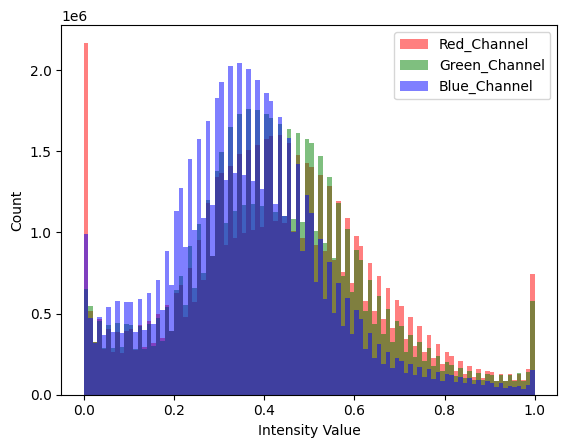

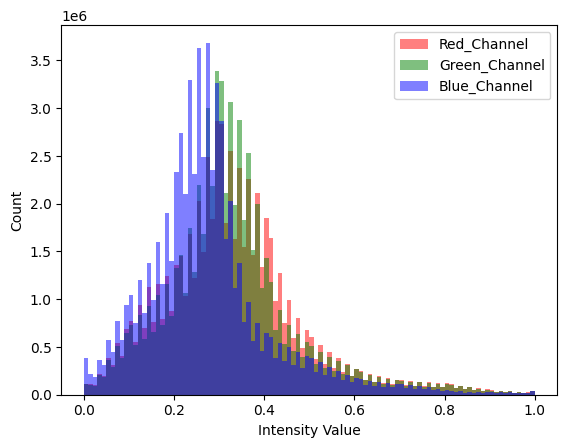

In [7]:
folder_path_A = "val/A/"
folder_path_B = "val/B/"
all_images_A = os.listdir(folder_path_A)
images_list_A = [file for file in all_images_A if os.path.isfile(os.path.join(folder_path_A, file))]

img = mpimg.imread(folder_path_A + images_list_A[0])
count_pixels = img.shape[0] * img.shape[1]

all_pixel_values_A = []
all_pixel_values_B = []

for file in images_list_A:
    image_A = mpimg.imread(folder_path_A + file)
    image_B = mpimg.imread(folder_path_B + file)

    all_pixel_values_A.append(image_A.reshape(-1, image_A.shape[-1]))
    all_pixel_values_B.append(image_B.reshape(-1, image_B.shape[-1]))

all_pixel_values_A = np.concatenate(all_pixel_values_A, axis=0)
mean_A = np.mean(all_pixel_values_A)
std_A = np.std(all_pixel_values_A)

print(f"mean: {mean_A} and std {std_A} of dataset t0")

all_pixel_values_B = np.concatenate(all_pixel_values_B, axis=0)
mean_B = np.mean(all_pixel_values_B)
std_B = np.std(all_pixel_values_B)

print(f"mean: {mean_B} and std {std_B} of dataset t1")

_ = plt.hist(all_pixel_values_A[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 1].ravel(), bins = 100, color = 'Green', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 2].ravel(), bins = 100, color = 'Blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()
_ = plt.hist(all_pixel_values_B[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 1].ravel(), bins = 100, color = 'green', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 2].ravel(), bins = 100, color = 'blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

mean: 0.4172159731388092 and std 0.204838365316391 of dataset t0
mean: 0.3124827742576599 and std 0.15058697760105133 of dataset t1


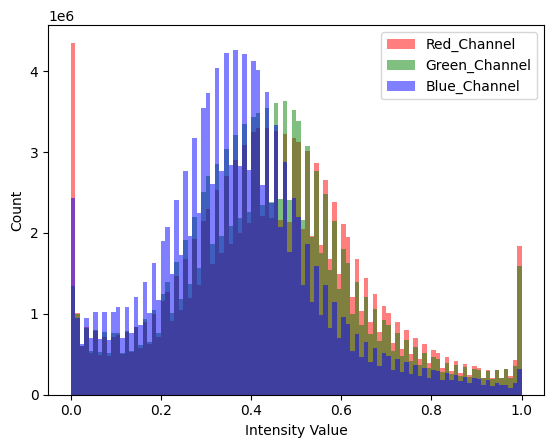

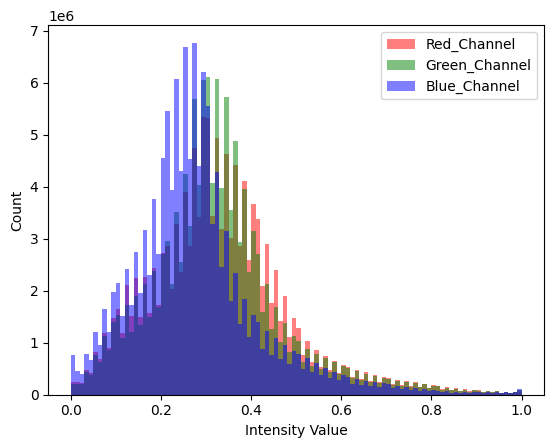

In [8]:
folder_path_A = "test/A/"
folder_path_B = "test/B/"
all_images_A = os.listdir(folder_path_A)
images_list_A = [file for file in all_images_A if os.path.isfile(os.path.join(folder_path_A, file))]

img = mpimg.imread(folder_path_A + images_list_A[0])
count_pixels = img.shape[0] * img.shape[1]

all_pixel_values_A = []
all_pixel_values_B = []

for file in images_list_A:
    image_A = mpimg.imread(folder_path_A + file)
    image_B = mpimg.imread(folder_path_B + file)

    all_pixel_values_A.append(image_A.reshape(-1, image_A.shape[-1]))
    all_pixel_values_B.append(image_B.reshape(-1, image_B.shape[-1]))

all_pixel_values_A = np.concatenate(all_pixel_values_A, axis=0)
mean_A = np.mean(all_pixel_values_A)
std_A = np.std(all_pixel_values_A)

print(f"mean: {mean_A} and std {std_A} of dataset t0")

all_pixel_values_B = np.concatenate(all_pixel_values_B, axis=0)
mean_B = np.mean(all_pixel_values_B)
std_B = np.std(all_pixel_values_B)

print(f"mean: {mean_B} and std {std_B} of dataset t1")

_ = plt.hist(all_pixel_values_A[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 1].ravel(), bins = 100, color = 'Green', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 2].ravel(), bins = 100, color = 'Blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()
_ = plt.hist(all_pixel_values_B[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 1].ravel(), bins = 100, color = 'green', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 2].ravel(), bins = 100, color = 'blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

mean: 0.42608481645584106 and std 0.20543722808361053 of dataset t0
mean: 0.3241749405860901 and std 0.15350639820098877 of dataset t1


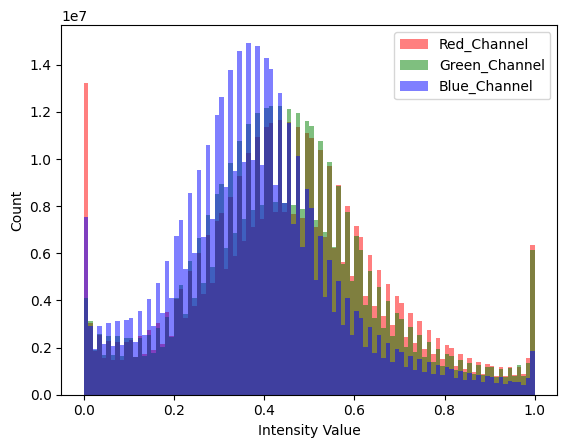

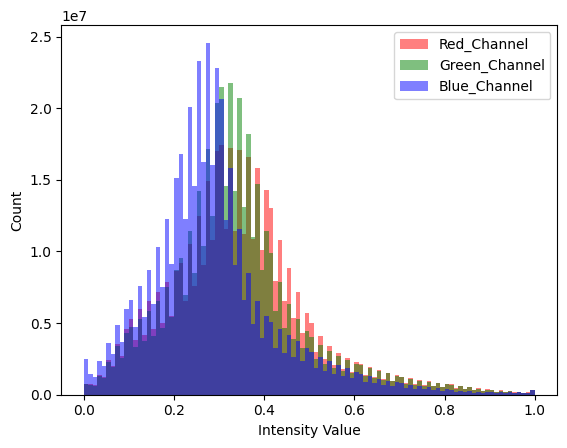

In [9]:
folder_path_A = "train/A/"
folder_path_B = "train/B/"
all_images_A = os.listdir(folder_path_A)
images_list_A = [file for file in all_images_A if os.path.isfile(os.path.join(folder_path_A, file))]

img = mpimg.imread(folder_path_A + images_list_A[0])
count_pixels = img.shape[0] * img.shape[1]

all_pixel_values_A = []
all_pixel_values_B = []

for file in images_list_A:
    image_A = mpimg.imread(folder_path_A + file)
    image_B = mpimg.imread(folder_path_B + file)

    all_pixel_values_A.append(image_A.reshape(-1, image_A.shape[-1]))
    all_pixel_values_B.append(image_B.reshape(-1, image_B.shape[-1]))

all_pixel_values_A = np.concatenate(all_pixel_values_A, axis=0)
mean_A = np.mean(all_pixel_values_A)
std_A = np.std(all_pixel_values_A)

print(f"mean: {mean_A} and std {std_A} of dataset t0")

all_pixel_values_B = np.concatenate(all_pixel_values_B, axis=0)
mean_B = np.mean(all_pixel_values_B)
std_B = np.std(all_pixel_values_B)

print(f"mean: {mean_B} and std {std_B} of dataset t1")

_ = plt.hist(all_pixel_values_A[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 1].ravel(), bins = 100, color = 'Green', alpha = 0.5)
_ = plt.hist(all_pixel_values_A[:, 2].ravel(), bins = 100, color = 'Blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()
_ = plt.hist(all_pixel_values_B[:, 0].ravel(), bins = 100, color = 'red', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 1].ravel(), bins = 100, color = 'green', alpha = 0.5)
_ = plt.hist(all_pixel_values_B[:, 2].ravel(), bins = 100, color = 'blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

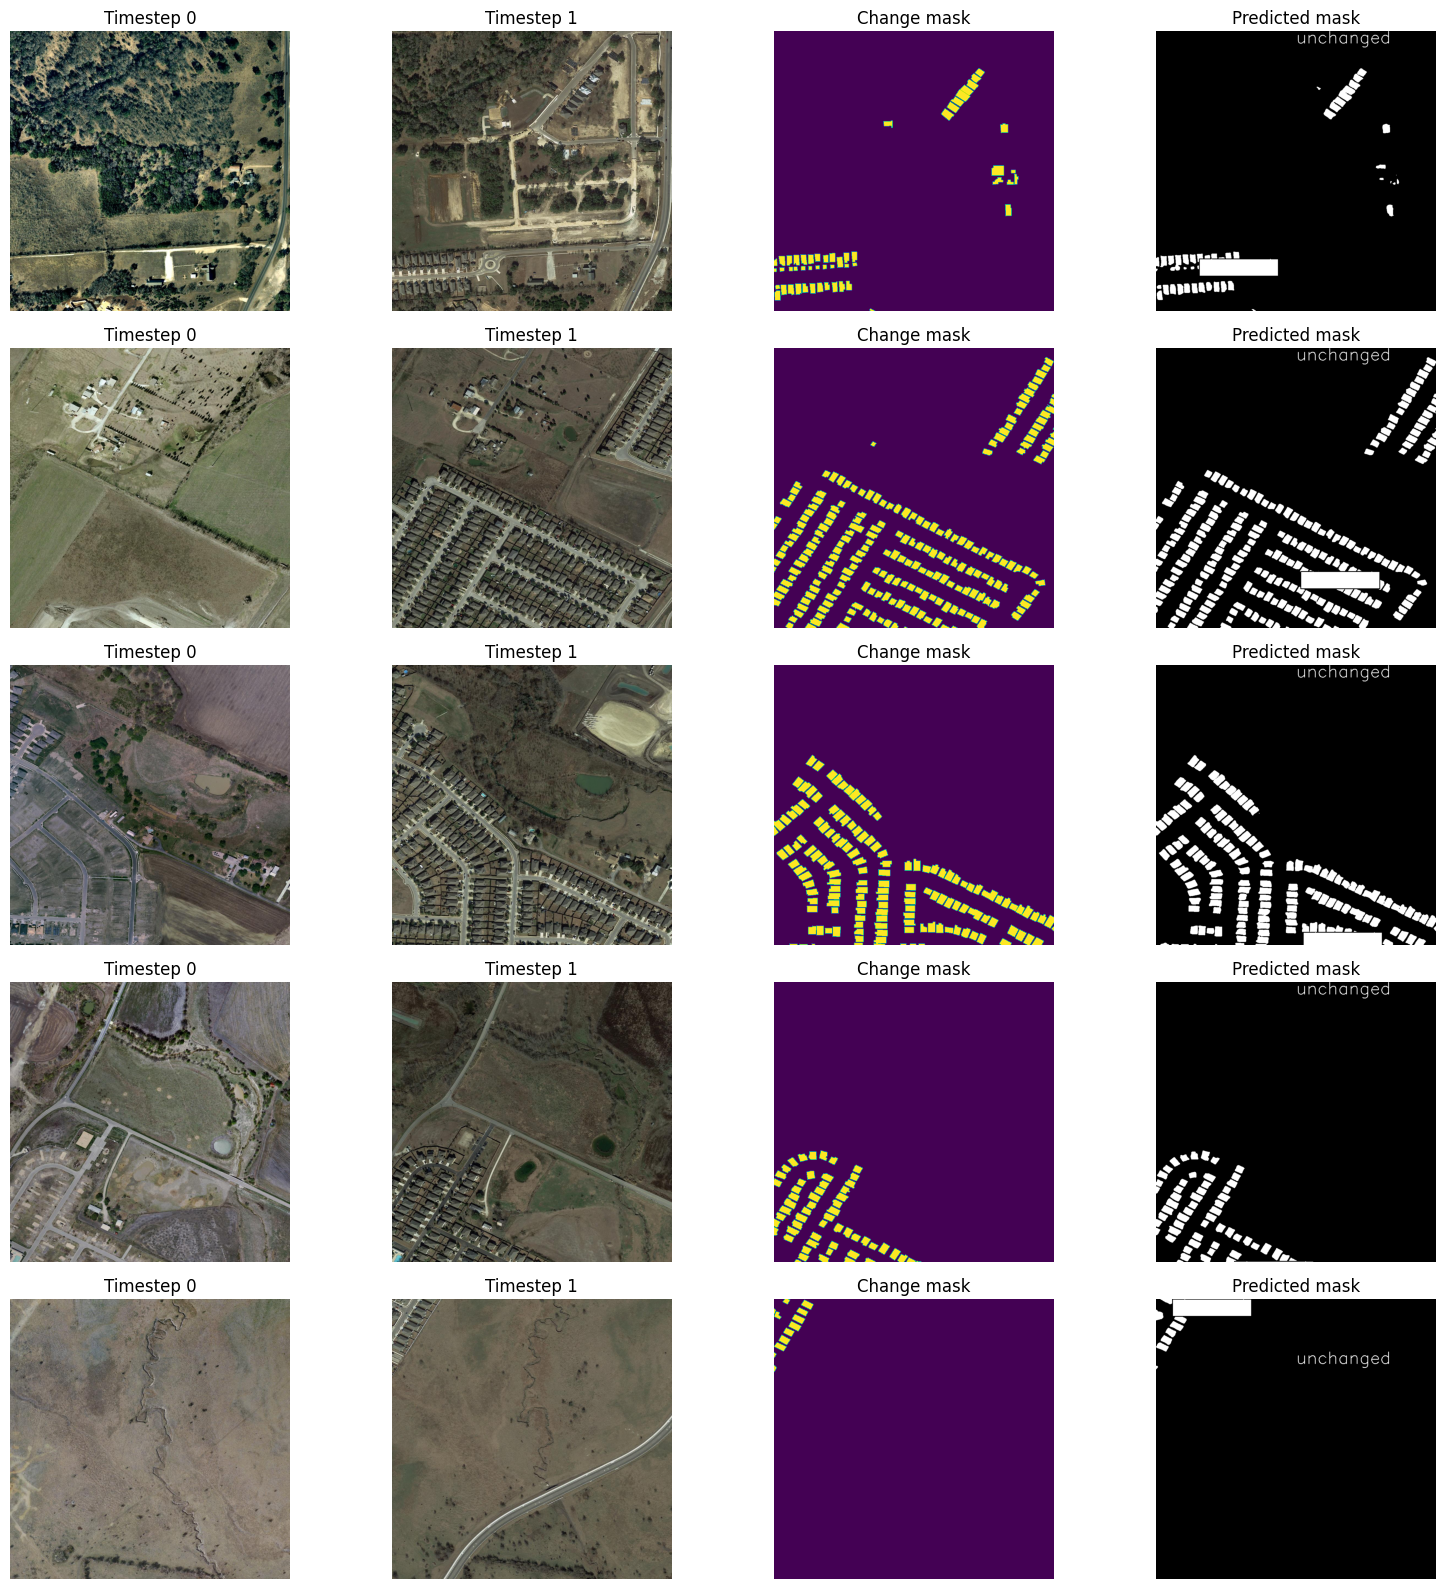

In [10]:
folder_path = "test/A/"
all_files = os.listdir(folder_path)
file_list = [file for file in all_files if os.path.isfile(os.path.join(folder_path, file))]
selected_files = random.sample(file_list, 5)


batch = [
    [folder_path + selected_files[0], 'test/B/' + selected_files[0], 'test/label/' + selected_files[0], 'vis_image/' + selected_files[0]],
    [folder_path + selected_files[1], 'test/B/' + selected_files[1], 'test/label/' + selected_files[1], 'vis_image/' + selected_files[1]],
    [folder_path + selected_files[2], 'test/B/' + selected_files[2], 'test/label/' + selected_files[2], 'vis_image/' + selected_files[2]],
    [folder_path + selected_files[3], 'test/B/' + selected_files[3], 'test/label/' + selected_files[3], 'vis_image/' + selected_files[3]],
    [folder_path + selected_files[4], 'test/B/' + selected_files[4], 'test/label/' + selected_files[4], 'vis_image/' + selected_files[4]]
]

labels = ['Timestep 0', 'Timestep 1', 'Change mask', 'Predicted mask']
fig, axes = plt.subplots(5, 4, figsize=(16, 16))

for i, set in enumerate(batch):
    for j, image_path in enumerate(set):
        image = mpimg.imread(image_path)

        axes[i, j].imshow(image)
        axes[i, j].set_title(labels[j])
        axes[i, j].axis('off')  

plt.tight_layout()

plt.show()